# CHANNEL 분석
#### 기본
- row : 8824건
- unique 고객번호 : 6,766건
- 이용횟수 합계 : 119,736건

#### ㅁ
- MOBILE 사용자의 이용횟수가 압도적임 (106,988 vs 12,748)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install cx_Oracle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle
import warnings

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

DatabaseError: ignored

In [1]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select
case when 제휴사 like '%APP' then 'MOBILE'
else 'ONLINEMALL' end 유형, sum(이용횟수) 이용횟수
from channel
group by case when 제휴사 like '%APP' then 'MOBILE'
else 'ONLINEMALL' end
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_m = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_m.head()

NameError: ignored

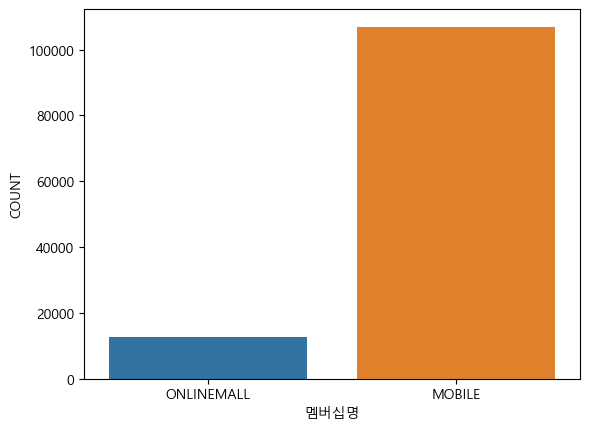

In [ ]:
sns.barplot(data=df_m, x='유형', y='이용횟수')
plt.xlabel('멤버십명')
plt.ylabel('COUNT')
plt.show()

In [ ]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select
case when 제휴사 like 'A%' then 'A'
when 제휴사 like 'B%' then 'B'
when 제휴사 like 'C%' then 'C'
else 'D' end 유형, sum(이용횟수) 이용횟수
from channel
group by case when 제휴사 like 'A%' then 'A'
when 제휴사 like 'B%' then 'B'
when 제휴사 like 'C%' then 'C'
else 'D' end
order by 유형
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_c = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_c.head()

,유형,이용횟수
0,A,13256
1,B,102045
2,C,3826
3,D,609


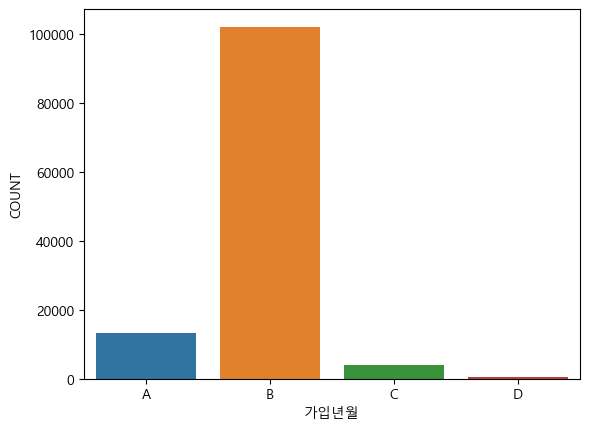

In [ ]:
sns.barplot(data=df_c, x='유형', y='이용횟수')
plt.xlabel('가입년월')
plt.ylabel('COUNT')
plt.show()

In [ ]:
# row 갯수
db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('''
select 제휴사, sum(이용횟수) 이용횟수 from channel
group by 제휴사
order by 제휴사
''')
x = cursor.fetchall()
# 커서 설명을 사용하여 열 이름을 가져옵니다
col_names = [desc[0] for desc in cursor.description]
df_c = pd.DataFrame(x, columns=col_names)    # 이거 없어도 됨 -> [:5] - 첫 5개의 열 이름만 사용
df_c

,제휴사,이용횟수
0,A_MOBILE/APP,13256
1,B_MOBILE/APP,93067
2,B_ONLINEMALL,8978
3,C_MOBILE/APP,56
4,C_ONLINEMALL,3770


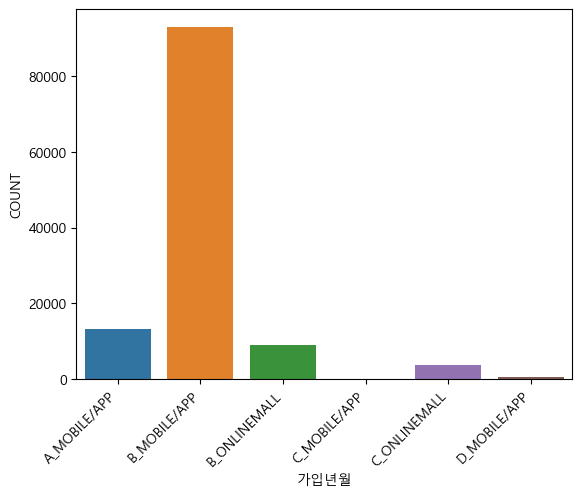

In [ ]:
sns.barplot(data=df_c, x='제휴사', y='이용횟수')
plt.xticks(rotation=45, ha='right')ㄴ
plt.xlabel('가입년월')
plt.ylabel('COUNT')
plt.show()